In [1]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


### Read the video, extract frames from it and save them as images 

In [2]:
count = 0
videoFile = "train/output4.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


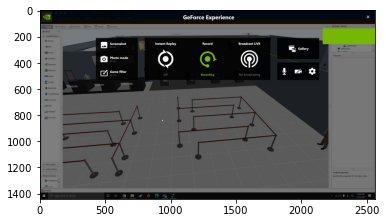

In [3]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

### Label a few images for training the model 

In [4]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,1
3,frame3.jpg,1
4,frame4.jpg,1


In [5]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [6]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [7]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [8]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
X = preprocess_input(X, mode='caffe')      # preprocessing the input data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

### Building the model 

In [10]:
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.models import Sequential

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [12]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((235, 7, 7, 2048), (101, 7, 7, 2048))

In [13]:
X_train = X_train.reshape(235, 7*7*2048)      # converting to 1-D
X_valid = X_valid.reshape(101, 7*7*2048)

In [14]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [15]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*2048,)))    # input layer
model.add(Dense(units=2048, activation='sigmoid'))   # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=1024, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(5, activation='softmax'))            # output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2

In [17]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# iii. Training the model
model.fit(train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
8/8 [==============================] - 6s 665ms/step - loss: 1.8987 - accuracy: 0.2457 - val_loss: 1.3122 - val_accuracy: 0.5347
Epoch 2/20
8/8 [==============================] - 4s 532ms/step - loss: 1.4577 - accuracy: 0.3620 - val_loss: 1.1680 - val_accuracy: 0.4851
Epoch 3/20
8/8 [==============================] - 4s 536ms/step - loss: 1.2086 - accuracy: 0.5080 - val_loss: 0.9566 - val_accuracy: 0.7426
Epoch 4/20
8/8 [==============================] - 5s 566ms/step - loss: 0.9896 - accuracy: 0.6121 - val_loss: 0.6150 - val_accuracy: 0.8119
Epoch 5/20
8/8 [==============================] - 5s 610ms/step - loss: 0.5178 - accuracy: 0.8146 - val_loss: 0.3968 - val_accuracy: 0.8911
Epoch 6/20
8/8 [==============================] - 5s 566ms/step - loss: 0.3067 - accuracy: 0.9201 - val_loss: 0.3478 - val_accuracy: 0.9010
Epoch 7/20
8/8 [==============================] - 5s 590ms/step - loss: 0.1535 - accuracy: 0.9853 - val_loss: 0.2360 - val_accuracy: 0.9109
Epoch 8/20
8/8 [====

### Calculate averages over several users

In [52]:
count = 0
videoFile = "control/output1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="control/control4/user%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [19]:
test = pd.read_csv('user/user1/test.csv')

In [20]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('control/control4/' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [21]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)
test_image.shape

(49, 224, 224, 3)

In [22]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='caffe')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(49, 7*7*2048)

# zero centered images
test_image = test_image/test_image.max()

### predict

In [23]:
user1 = model.predict_classes(test_image)

C:\Users\lotla\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
user2 = model.predict_classes(test_image)

In [25]:
user3 = model.predict_classes(test_image)

In [26]:
user4 = model.predict_classes(test_image)

In [27]:
user5 = model.predict_classes(test_image)

In [28]:
user6 = model.predict_classes(test_image)

In [31]:
user7 = model.predict_classes(test_image)

In [32]:
check_in_total = []
lobby_total = []
baggage_total = []
waiting_total = []

### Calculate the screen time over users individually

In [33]:
print("USER 1 DATA")
print("User looks at CHECK IN area for", user1[user1==1].shape[0], "seconds")
check_in_total.append(user1[user1==1].shape[0])
print("User looks at LOBBY for", user1[user1==2].shape[0], "seconds")
lobby_total.append(user1[user1==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user1[user1==3].shape[0], "seconds")
baggage_total.append(user1[user1==3].shape[0])
print("User looks at WAITING AREA for", user1[user1==4].shape[0], "seconds")
waiting_total.append(user1[user1==4].shape[0])

USER 1 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


In [34]:
print("USER 2 DATA")
print("User looks at CHECK IN area for", user2[user2==1].shape[0], "seconds")
check_in_total.append(user2[user2==1].shape[0])
print("User looks at LOBBY for", user2[user2==2].shape[0], "seconds")
lobby_total.append(user2[user2==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user2[user2==3].shape[0], "seconds")
baggage_total.append(user2[user2==3].shape[0])
print("User looks at WAITING AREA for", user2[user2==4].shape[0], "seconds")
waiting_total.append(user2[user2==4].shape[0])

USER 2 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


In [35]:
print("USER 3 DATA")
print("User looks at CHECK IN area for", user3[user3==1].shape[0], "seconds")
check_in_total.append(user3[user3==1].shape[0])
print("User looks at LOBBY for", user3[user3==2].shape[0], "seconds")
lobby_total.append(user3[user3==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user3[user3==3].shape[0], "seconds")
baggage_total.append(user3[user3==3].shape[0])
print("User looks at WAITING AREA for", user3[user3==4].shape[0], "seconds")
waiting_total.append(user3[user3==4].shape[0])

USER 3 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


In [36]:
print("USER 4 DATA")
print("User looks at CHECK IN area for", user4[user4==1].shape[0], "seconds")
check_in_total.append(user4[user4==1].shape[0])
print("User looks at LOBBY for", user4[user4==2].shape[0], "seconds")
lobby_total.append(user4[user4==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user4[user4==3].shape[0], "seconds")
baggage_total.append(user4[user4==3].shape[0])
print("User looks at WAITING AREA for", user4[user4==4].shape[0], "seconds")
waiting_total.append(user4[user4==4].shape[0])

USER 4 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


In [37]:
print("USER 5 DATA")
print("User looks at CHECK IN area for", user5[user5==1].shape[0], "seconds")
check_in_total.append(user5[user5==1].shape[0])
print("User looks at LOBBY for", user5[user5==2].shape[0], "seconds")
lobby_total.append(user5[user5==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user5[user5==3].shape[0], "seconds")
baggage_total.append(user5[user5==3].shape[0])
print("User looks at WAITING AREA for", user5[user5==4].shape[0], "seconds")
waiting_total.append(user5[user5==4].shape[0])

USER 5 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


In [99]:
print("USER 6 DATA")
print("User looks at CHECK IN area for", user6[user6==1].shape[0], "seconds")
check_in_total.append(user6[user6==1].shape[0])
print("User looks at LOBBY for", user6[user6==2].shape[0], "seconds")
lobby_total.append(user6[user6==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user6[user6==3].shape[0], "seconds")
baggage_total.append(user6[user6==3].shape[0])
print("User looks at WAITING AREA for", user6[user6==4].shape[0], "seconds")
waiting_total.append(user6[user6==4].shape[0])

USER 6 DATA
User looks at CHECK IN area for 39 seconds
User looks at LOBBY for 0 seconds
User looks at BAGGAGE SECURITY for 12 seconds
User looks at WAITING AREA for 0 seconds


In [100]:
print("USER 7 DATA")
print("User looks at CHECK IN area for", user7[user7==1].shape[0], "seconds")
check_in_total.append(user7[user7==1].shape[0])
print("User looks at LOBBY for", user7[user7==2].shape[0], "seconds")
lobby_total.append(user7[user7==2].shape[0])
print("User looks at BAGGAGE SECURITY for", user7[user7==3].shape[0], "seconds")
baggage_total.append(user7[user7==3].shape[0])
print("User looks at WAITING AREA for", user7[user7==4].shape[0], "seconds")
waiting_total.append(user7[user7==4].shape[0])

USER 7 DATA
User looks at CHECK IN area for 15 seconds
User looks at LOBBY for 9 seconds
User looks at BAGGAGE SECURITY for 9 seconds
User looks at WAITING AREA for 16 seconds


### Calculate screen time averages over all users

In [118]:
check_in_avg = round(sum(check_in_total)/7, 2)
lobby_avg = round(sum(lobby_total)/7, 2)
baggage_avg = round(sum(baggage_total)/7, 2)
waiting_avg = round(sum(waiting_total)/7, 2)
avg_totals = []
avg_totals.append(check_in_avg)
avg_totals.append(lobby_avg)
avg_totals.append(baggage_avg)
avg_totals.append(waiting_avg)
print(check_in_avg, lobby_avg, baggage_avg, waiting_avg)
print(avg_totals)

150.29 94.43 35.71 22.0
[150.29, 94.43, 35.71, 22.0]


In [133]:
user1sub = []
for i in range(1, 5, 1):
    user1sub.append((user1[user1==i].shape[0] - avg_totals[i-1]) ** 2)
user1sum = sum(user1sub)
stdev1 = math.sqrt(user1sum/4)

user2sub = []
for i in range(1, 5, 1):
    user2sub.append((user2[user2==i].shape[0] - avg_totals[i-1]) ** 2)
user2sum = sum(user2sub)
stdev2 = math.sqrt(user2sum/4)

user3sub = []
for i in range(1, 5, 1):
    user3sub.append((user3[user3==i].shape[0] - avg_totals[i-1]) ** 2)
user3sum = sum(user3sub)
stdev3 = math.sqrt(user3sum/4)

user4sub = []
for i in range(1, 5, 1):
    user4sub.append((user4[user4==i].shape[0] - avg_totals[i-1]) ** 2)
user4sum = sum(user4sub)
stdev4 = math.sqrt(user4sum/4)

user5sub = []
for i in range(1, 5, 1):
    user5sub.append((user5[user5==i].shape[0] - avg_totals[i-1]) ** 2)
user5sum = sum(user5sub)
stdev5 = math.sqrt(user5sum/4)

user6sub = []
for i in range(1, 5, 1):
    user6sub.append((user6[user6==i].shape[0] - avg_totals[i-1]) ** 2)
user6sum = sum(user6sub)
stdev6 = math.sqrt(user6sum/4)

user7sub = []
for i in range(1, 5, 1):
    user7sub.append((user7[user7==i].shape[0] - avg_totals[i-1]) ** 2)
user7sum = sum(user7sub)
stdev7 = math.sqrt(user7sum/4)

46.49223886843911
319.2931932800948
71.90784571241167
52.7909866833345
59.94921413162979
74.74732955096123
81.16509887260658


In [135]:
print("user 1 stdev is", round(stdev1, 2))
print("user 2 stdev is", round(stdev2, 2))
print("user 3 stdev is", round(stdev3, 2))
print("user 4 stdev is", round(stdev4, 2))
print("user 5 stdev is", round(stdev5, 2))
print("user 6 stdev is", round(stdev6, 2))
print("user 7 stdev is", round(stdev7, 2))

user 1 stdev is 46.49
user 2 stdev is 319.29
user 3 stdev is 71.91
user 4 stdev is 52.79
user 5 stdev is 59.95
user 6 stdev is 74.75
user 7 stdev is 81.17
